In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set(style="darkgrid")

## Read the data

In [129]:
hands = pd.read_csv("hands1.csv")

In [46]:
games = pd.read_csv("games1.csv")

### Test plots

## Basic hands analysis

### State statistics

A histogram with x labels indicate which state is which.

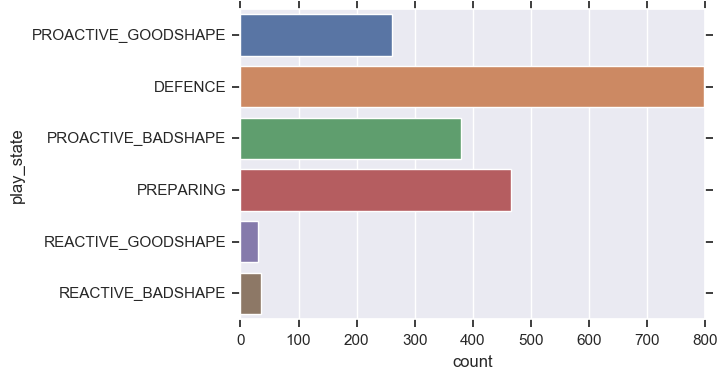

In [5]:
sns.countplot(y=hands["play_state"])

### State boxplot
I need to clearly see the average EV of each state.

Note that the "REACTIVE" data is too less. Not enough to adjust the algorithm.

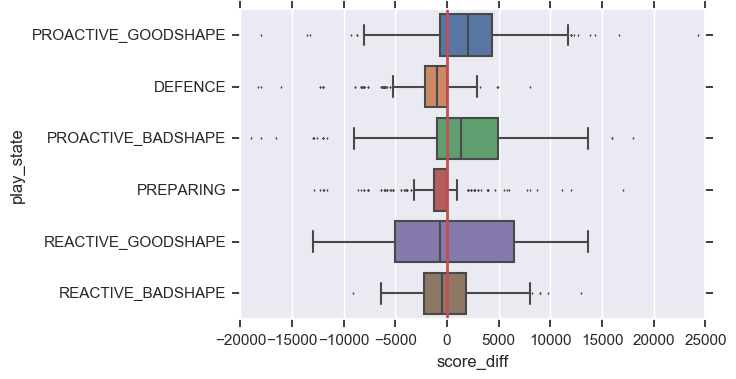

In [22]:
sns.boxplot(x="score_diff", y="play_state", data=hands, fliersize=1)
plt.axvline(color='r', linewidth=2)

### State index statistics

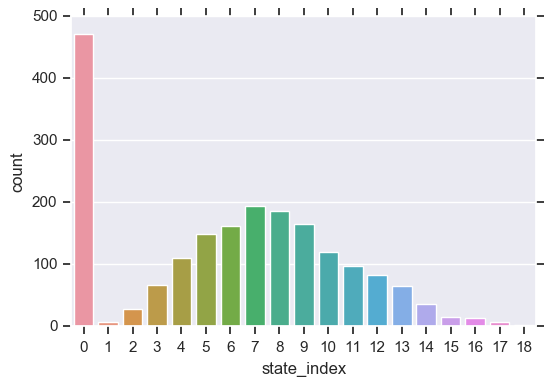

In [25]:
sns.countplot(x="state_index", data=hands)

### Start defence index

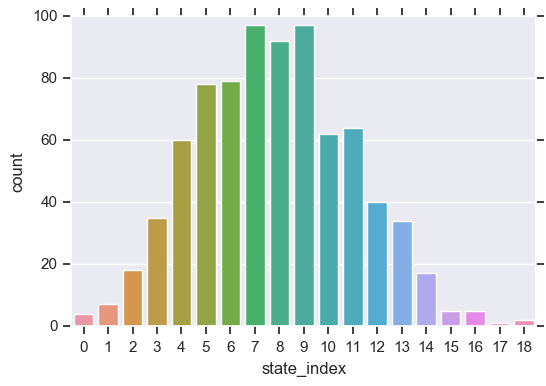

In [55]:
sns.countplot(x="state_index", data=hands[hands["play_state"]=="DEFENCE"])

### Score difference according to state index
After plotting, I find that data is not enough.

I want the "distplot" liked graph. Give me a barplot with a line telling me the dist of EV.

### Score and meld times

(-10000, 10000)

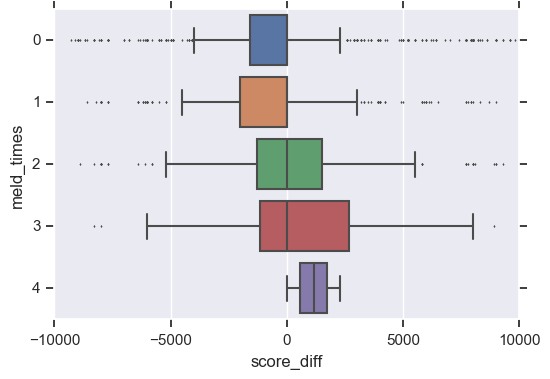

In [127]:
ax = sns.boxplot(x="score_diff", y="meld_times", orient="h", data=hands, fliersize=1)
ax.set_xlim(-10000, 10000)

(-10000, 10000)

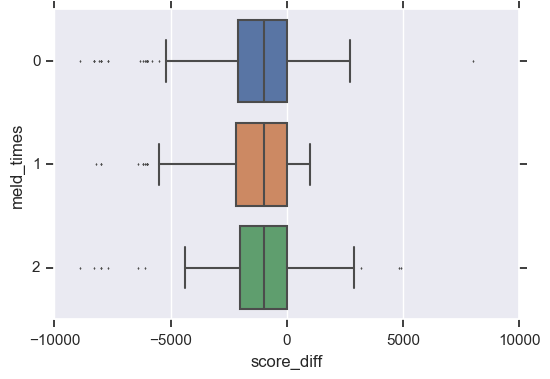

In [128]:
## defence when melded
ax = sns.boxplot(x="score_diff", y="meld_times", orient="h", data=hands[(hands["play_state"] == "DEFENCE") & (hands["meld_times"] < 3)], fliersize=1)
ax.set_xlim(-10000, 10000)

(-10000, 10000)

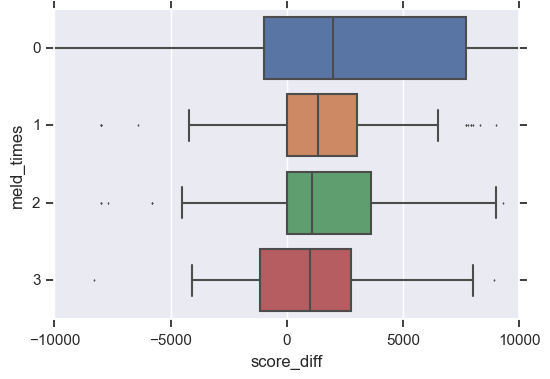

In [126]:
## offense when melded
ax = sns.boxplot(x="score_diff", y="meld_times", orient="h", data=hands[(hands["play_state"] != "DEFENCE") & (hands["play_state"] != "PREPARING") & (hands["meld_times"] < 4)], fliersize=1)
ax.set_xlim(-10000, 10000)

### Score and reach

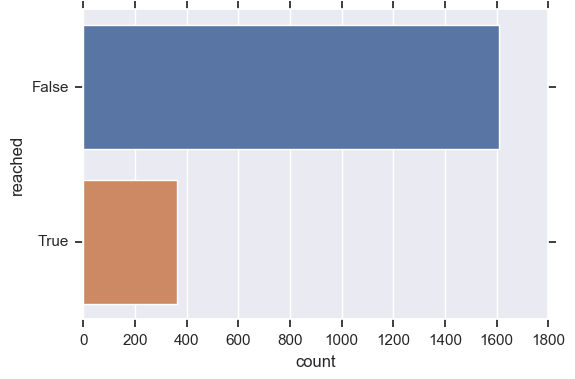

In [87]:
sns.countplot(y="reached", data=hands)

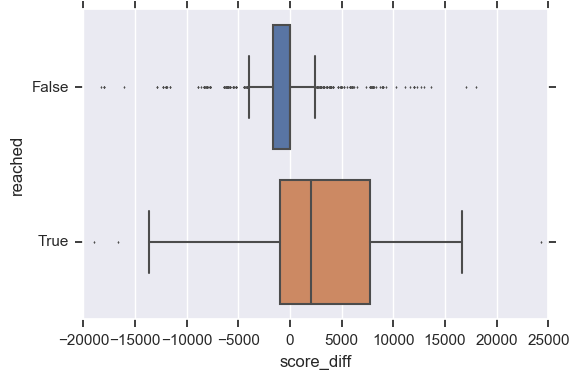

In [92]:
sns.boxplot(x="score_diff", y="reached", orient="h", data=hands, fliersize=1)

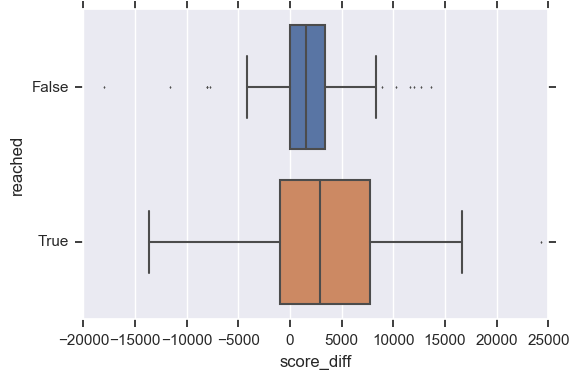

In [107]:
## GoodShape
sns.boxplot(x="score_diff", y="reached", orient="h", data=hands[(hands["play_state"]=="PROACTIVE_GOODSHAPE") | (hands["play_state"]=="REACTIVE_GOODSHAPE")], fliersize=1)

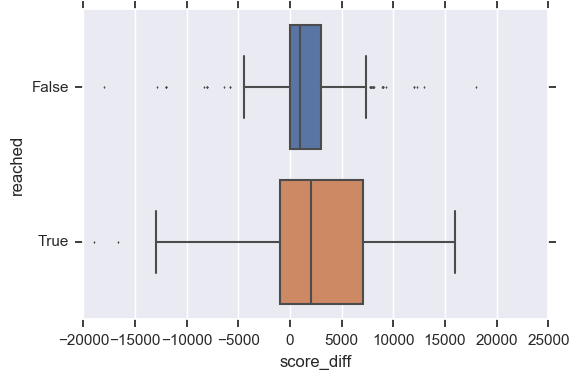

In [108]:
## BadShape
sns.boxplot(x="score_diff", y="reached", orient="h", data=hands[(hands["play_state"]=="PROACTIVE_BADSHAPE") | (hands["play_state"]=="REACTIVE_BADSHAPE")], fliersize=1)

### Jubeat plot

In [71]:
_, row = next(games.iterrows())

In [77]:
pos_diff = np.zeros([4, 4])
for _, row in games.iterrows():
    pos_diff[row["final_position"]-1,row["south_position"]-1]+=1

In [83]:
sns.heatmap?

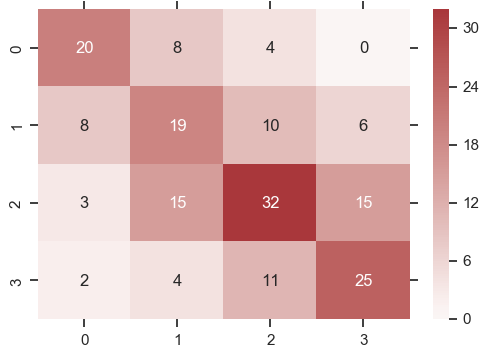

In [86]:
sns.heatmap(pos_diff, center=0, cmap="vlag", annot=True)

## According to final position

### Final position with states

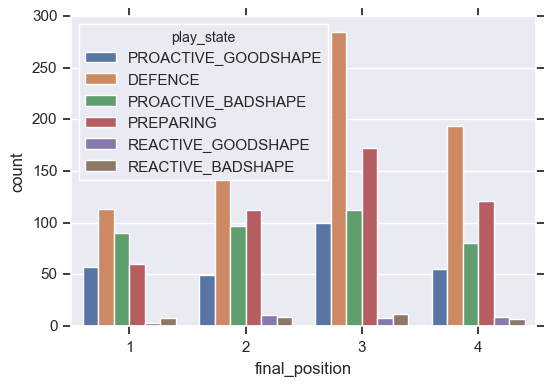

In [141]:
sns.countplot(x="final_position", hue="play_state", data=hands)

### Final position with melds

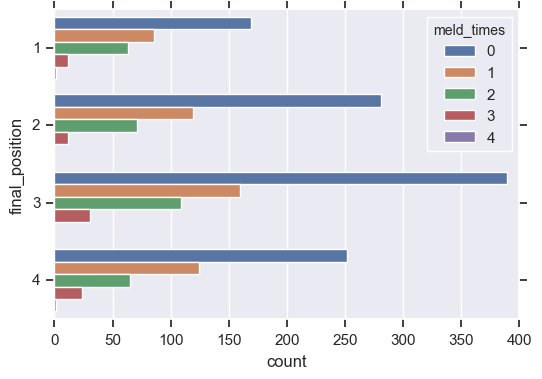

In [144]:
sns.countplot(y="final_position", hue="meld_times", data=hands)

### Final position with reach